**CART (Classification And Regression Tree)**

- a  variation of the decision tree algorithm
-It can handle both classification and regression tasks.
-CART uses a greedy approach to split the data at each node.For classification tasks, CART uses **Gini impurity** as the splitting criterion. The lower the Gini impurity, the more pure the subset is. For regression tasks, CART uses **residual reduction** as the splitting criterion. The lower the residual reduction, the better the fit of the model to the data.
-Decision trees where the target variable or the terminal node can take continuous values (typically real numbers) are called **regression trees**. If the target variable can take a discrete set of values these trees are called **classification trees**.

-------------------------------------------------------------------------------------------------**REGRESSION**------------------------------------------------------------------------------------

**#Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

**Importing the data set**

In [2]:
#California Housing dataset
data = pd.read_csv("/content/housing.csv")


In [37]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
data.shape

(20640, 10)

In [39]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Finding the amount of missing data for each column
missing = data.isnull().sum()
# missing_percentage = (missing / len(data)) * 100

print(missing, '\n')
# print(missing_percentage)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64 



In [12]:
# Remvoing rows with missing data. As such we are reducing the data available by ~1.002907%
# data = data.dropna()

# # Verifying the removal
# print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


OR fill the missing value with mean value

In [5]:
# HAndling rows with missing data using fillna values.
data.total_bedrooms=data.total_bedrooms.fillna(data.total_bedrooms.mean())
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
data.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Converting categorical columns to Numerical**

In [10]:
#Lable Encoding

from sklearn.preprocessing import LabelEncoder,StandardScaler

# Initialize the Label Encoder
label_encoder = LabelEncoder()
data['ocean_proximity'] = label_encoder.fit_transform(data['ocean_proximity'])

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


**OR**

In [ ]:
#One Hot Encoding

# data_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=False)

# data_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_prox').astype(int)
# data = pd.concat([data.drop('ocean_proximity', axis=1), data_dummies], axis=1)
# data

In [ ]:
# data_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


**Standardize data**

In [11]:
# Get column names first
names = data.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,1.291089


**visualize relationship between features and target**

**Check for Outliers:**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

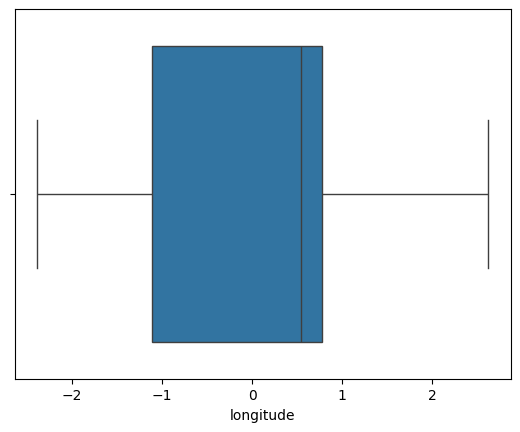

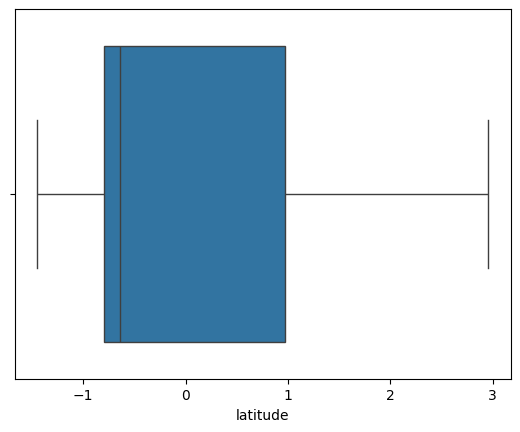

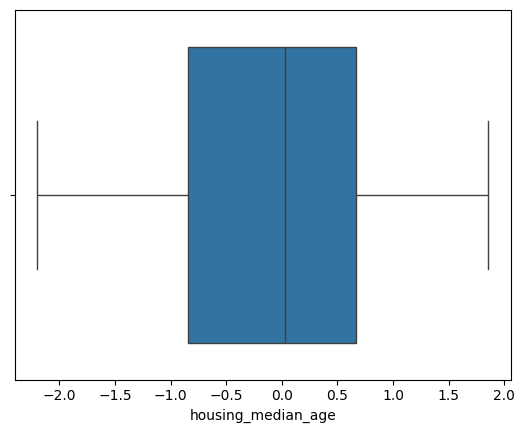

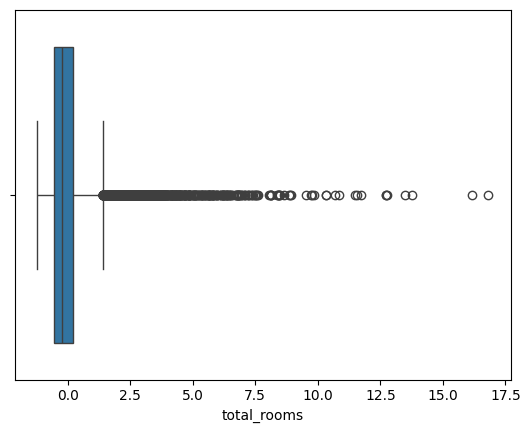

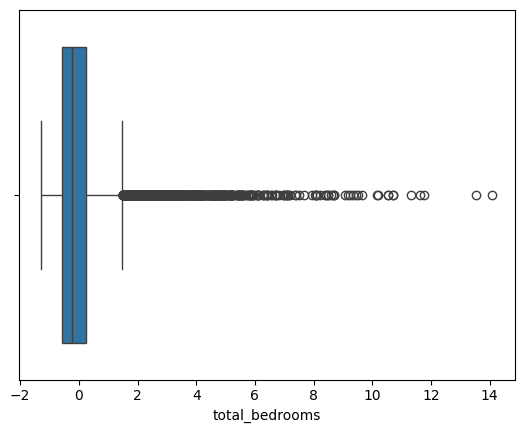

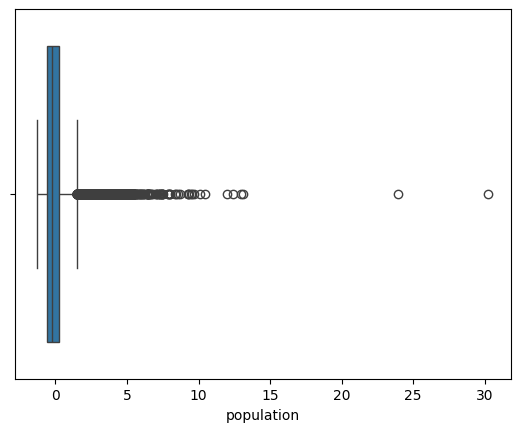

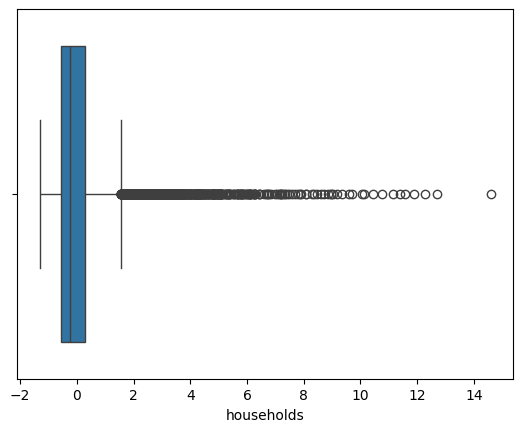

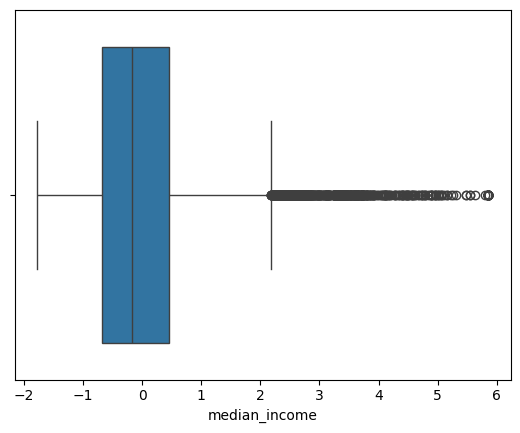

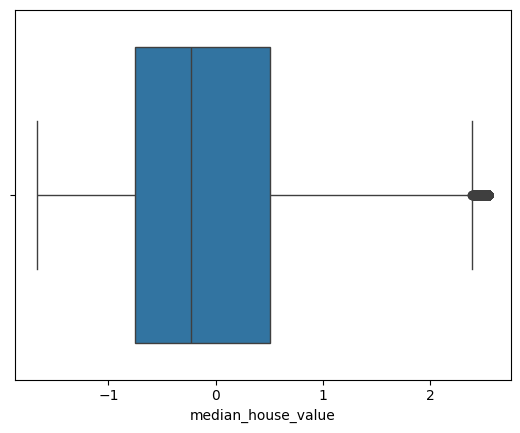

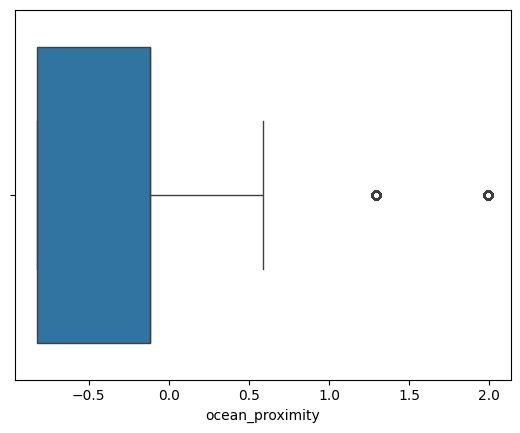

In [49]:
import seaborn as sns

for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

**Separating the features and the target variable**

In [12]:
X = scaled_df.drop(columns=['median_house_value'])
y = scaled_df['median_house_value']
print(X.shape)
print(y.shape)

(20640, 9)
(20640,)


In [ ]:
# X = data.drop(columns=['ocean_proximity'])

In [51]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-0.116739
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-0.116739
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.116739
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-0.116739


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


**Regression Tree**

Simple impelementtaion

In [26]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=113)# Explore all parameters

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)   #TRAINING

DecisionTreeRegressor(random_state=113)

In [27]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

y_predict = model.predict(x_test)   #PREDICTING
print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.599026548292393
0.6357343407048734


Implementation using 5/10 Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=113)

# Performing cross-validation (using 5-fold cross-validation as an example)
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Printing the cross-validation scores
print("Cross-validation MSE scores:", -cv_scores)
print("Mean MSE score:", -cv_scores.mean())

Once the parameters are finlaized/tuned using Cross Validation Technique then FIT (Train) your model on those parameters

In [ ]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=113)# All those parameters where your model performed well

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)   #TRAINING

In [ ]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)  #PREDICTING

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

EVALUATE AND VISUALIZE THE RESULTS

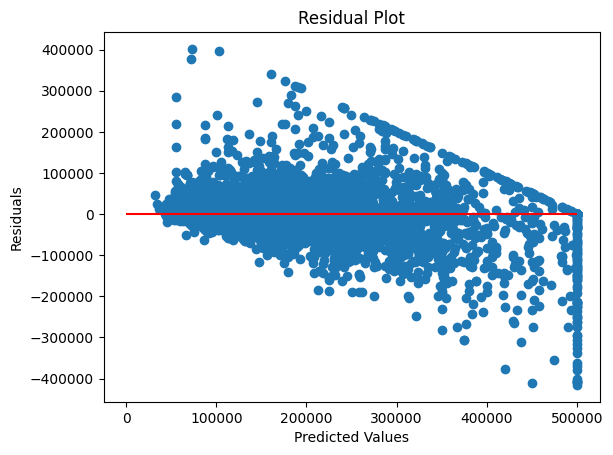

In [38]:
# 1. Residual Plot
residuals = y_test - y_predict
plt.scatter(y_predict, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_predict), color='r')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

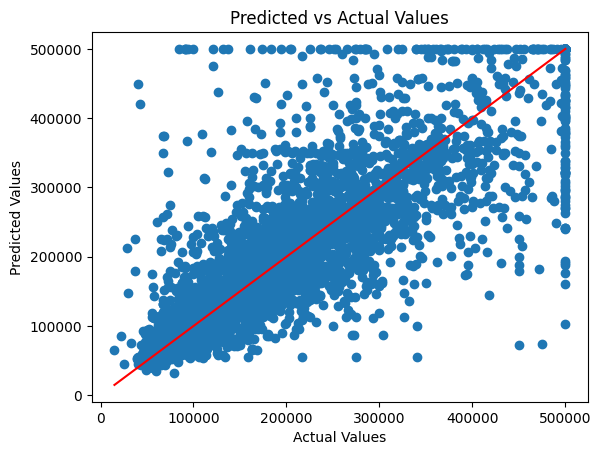

In [36]:
# 2. Plot Predicted vs Actual Values
plt.scatter(y_test, y_predict)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

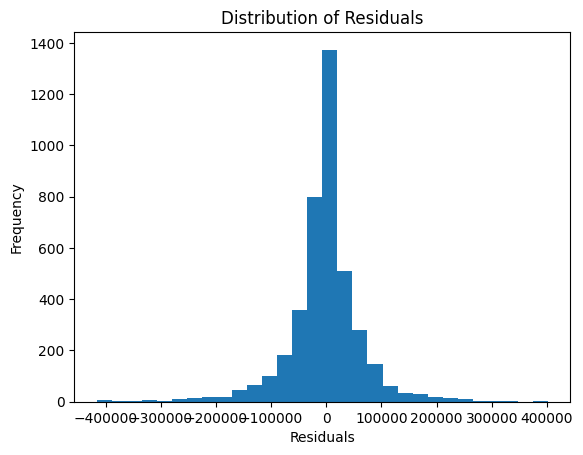

In [39]:
# 3. Distribution of Residuals
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [40]:
# 4. RMSE Calculation
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 68969.45063835925


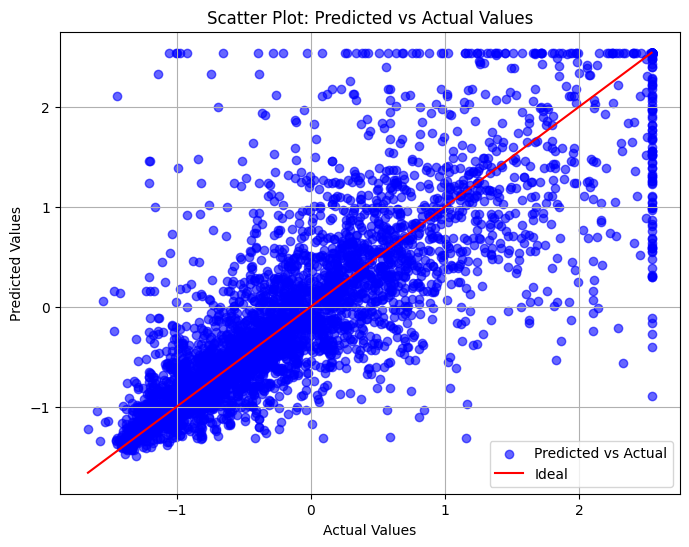

In [20]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

# Plot the diagonal line (y = x line), which represents perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ideal")

# Add title and labels
plt.title('Scatter Plot: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

EXTRA ANALYSIS OF DATASET

Missing Values:
                Missing Values  Percentage
total_bedrooms             207         1.0

Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.4621

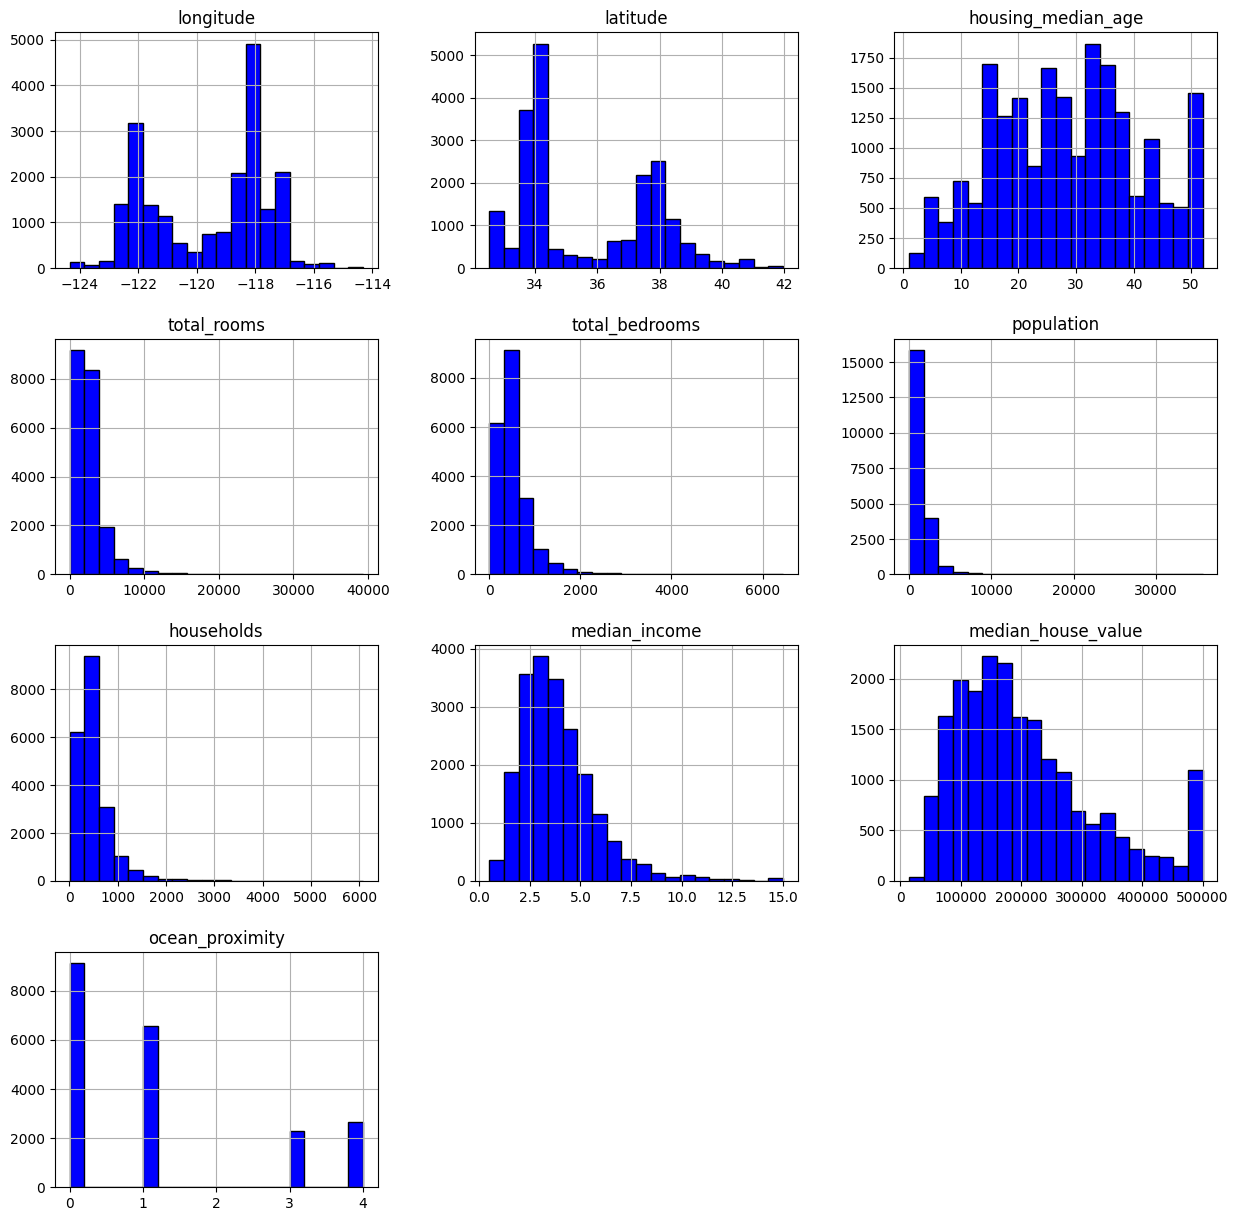

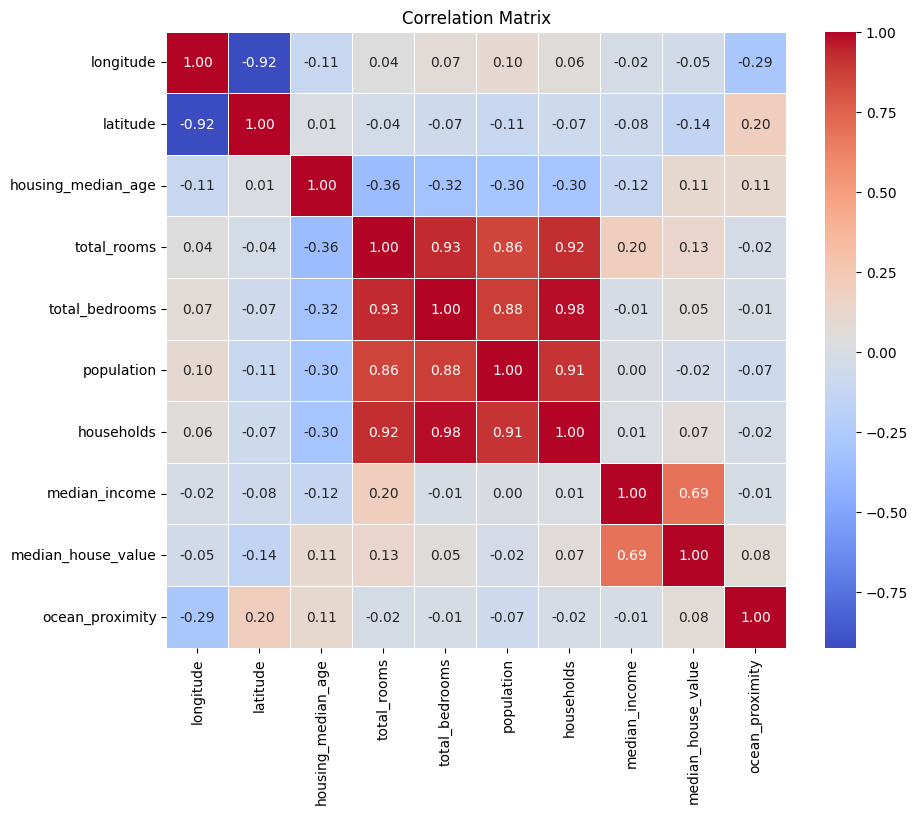


Correlation with Target (median_house_value):
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

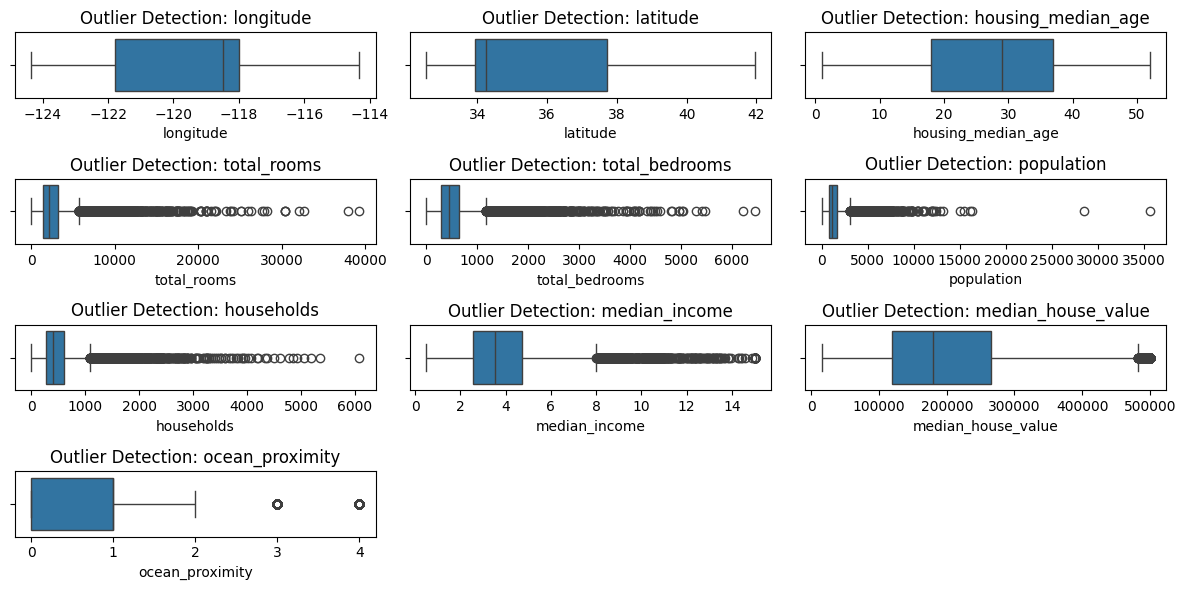

In [30]:
#EXTRA
import seaborn as sns
class AutoEDA:
    def __init__(self, df):
        """Initialize the class with a DataFrame."""
        self.df = df
        self._encode_categorical_columns()

    def _encode_categorical_columns(self):
        """Automatically encode categorical columns to numeric using Label Encoding."""
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        self.label_encoders = {}
        for col in categorical_cols:
            le = LabelEncoder()
            self.df[col] = le.fit_transform(self.df[col])
            self.label_encoders[col] = le  # Store the encoder for future reference if needed

    def missing_values(self):
        """Display missing values count and percentage."""
        missing_data = self.df.isnull().sum()
        missing_percentage = (self.df.isnull().mean() * 100).round(2)
        missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
        return missing_df[missing_df['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    def summary_stats(self):
        """Show summary statistics of numeric columns."""
        return self.df.describe()

    def correlation_matrix(self):
        """Plot a correlation heatmap."""
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

    def target_correlation(self, target):
        """Show correlation of all variables with the target variable."""
        correlations = self.df.corr()[target].sort_values(ascending=False)
        return correlations

    def plot_distributions(self):
        """Plot distributions for all numeric features."""
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        self.df[numeric_cols].hist(figsize=(15, 15), bins=20, color='blue', edgecolor='black')
        plt.show()

    def outlier_detection(self):
        """Detect outliers using box plots."""
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        plt.figure(figsize=(12, 6))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(len(numeric_cols)//3+1, 3, i)
            sns.boxplot(x=self.df[col])
            plt.title(f'Outlier Detection: {col}')
        plt.tight_layout()
        plt.show()

    def run_eda(self, target=None):
        """Run all EDA steps automatically."""
        print("Missing Values:")
        print(self.missing_values())
        print("\nSummary Statistics:")
        print(self.summary_stats())
        self.plot_distributions()
        self.correlation_matrix()
        if target:
            print(f"\nCorrelation with Target ({target}):")
            print(self.target_correlation(target))
        self.outlier_detection()

df1 = pd.read_csv('/content/housing.csv')
eda = AutoEDA(df1)
eda.run_eda(target='median_house_value')